In [14]:
%matplotlib inline

In [1]:
import easyaccess as ea
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
print(ea.__version__)
print(sns.__version__)

1.3.2-dev-01ae3bc
0.7.1


In [2]:
con = ea.connect('desoper')

Connecting to DB ** desoper ** ...


### Get all the TEST_01 tiles

In [3]:
qtiles = """
SELECT 
    p.unitname,
    p.reqnum,
    p.attnum,
    t.pfw_attempt_id,
    f.path,
    f.compression,
    d.filename
FROM 
    proctag t,
    pfw_attempt p,
    file_archive_info f,
    desfile d 
WHERE 
    d.id=f.desfile_id and 
    d.pfw_attempt_id = p.id and 
    t.pfw_attempt_id = p.id and 
    t.tag='Y3A1_COADD_TEST_01' and 
    f.filename like '%_i.fits' 
ORDER by unitname;"""


In [4]:
df_tiles = con.query_to_pandas(qtiles)

In [5]:
len(df_tiles)

43

### Last 3 tiles

In [6]:
df_tiles.tail(3)

,UNITNAME,REQNUM,ATTNUM,PFW_ATTEMPT_ID,PATH,COMPRESSION,FILENAME
40,DES2359+0126,2468,1,410751,ACT/multiepoch/Y3A1dev/DES2359+0126-r2468/p01/coadd,.fz,DES2359+0126_r2468p01_i.fits
41,DES2359-0041,2468,1,410752,ACT/multiepoch/Y3A1dev/DES2359-0041-r2468/p01/coadd,.fz,DES2359-0041_r2468p01_i.fits
42,DES2359-0124,2468,1,408758,ACT/multiepoch/Y3A1dev/DES2359-0124-r2468/p01/coadd,.fz,DES2359-0124_r2468p01_i.fits


In [7]:
list_path=df_tiles.FILENAME.tolist()

In [8]:
list2= [i.replace('_i.','_i_wavg.') for i in list_path]


In [9]:
list_s=str(list2).replace('[','(').replace(']',')')

In [30]:
list2

['DES0000+0209_r2468p01_i_wavg.fits',
 'DES0005+0043_r2468p01_i_wavg.fits',
 'DES0005+0209_r2468p01_i_wavg.fits',
 'DES0225+0001_r2468p01_i_wavg.fits',
 'DES0225+0043_r2468p01_i_wavg.fits',
 'DES0225+0126_r2468p01_i_wavg.fits',
 'DES0228+0001_r2468p01_i_wavg.fits',
 'DES0228+0043_r2468p01_i_wavg.fits',
 'DES0228+0126_r2468p01_i_wavg.fits',
 'DES0231+0001_r2468p01_i_wavg.fits',
 'DES0231+0043_r2468p01_i_wavg.fits',
 'DES0231+0126_r2468p01_i_wavg.fits',
 'DES0234+0001_r2468p01_i_wavg.fits',
 'DES0234+0043_r2468p01_i_wavg.fits',
 'DES0234+0126_r2468p01_i_wavg.fits',
 'DES0406-5414_r2468p03_i_wavg.fits',
 'DES0459-5622_r2468p01_i_wavg.fits',
 'DES0501-5457_r2468p01_i_wavg.fits',
 'DES0506-5705_r2468p01_i_wavg.fits',
 'DES0508-5331_r2468p01_i_wavg.fits',
 'DES0509-5414_r2468p01_i_wavg.fits',
 'DES0513-5540_r2468p01_i_wavg.fits',
 'DES2247-4414_r2468p06_i_wavg.fits',
 'DES2251-4331_r2468p06_i_wavg.fits',
 'DES2252-4249_r2468p01_i_wavg.fits',
 'DES2253-4540_r2468p06_i_wavg.fits',
 'DES2254-44

### Template queries

In [102]:
qdata="""
SELECT 
    id,
    alphawin_j2000 ra_{1},
    deltawin_j2000 dec_{1},
    mag_auto mag_auto_{1},
    mag_psf mag_psf_{1},
    c.tilename,
    a_image a_image_{1},
    b_image b_image_{1},
    theta_image theta_image_{1},
    flags flags_{1},
    spread_model spread_model_{1},
    imaflags_iso imaflags_iso_{1},
    wavg_mag_psf wavg_mag_psf_{1},
    wavg_spread_model wavg_spread_model_{1},
    nepochs nepochs_{1} 
FROM 
    coadd_object c,
    wavg w 
WHERE 
    c.id=w.coadd_object_id and 
    w.band=c.band and 
    w.filename = '{0}' and 
    c.band='{1}' 
"""

qy1="""
SELECT
    MAG_PSF_I,
    MAG_PSF_G,
    MAG_PSF_R,
    MAG_AUTO_G,
    MAG_AUTO_R,
    MAG_AUTO_I
FROM
    y1a1_coadd_objects 
WHERE
    tilename = '{0}'
"""

qsv1="""
SELECT
    MAG_PSF_I,
    MAG_PSF_G,
    MAG_PSF_R,
    MAG_AUTO_G,
    MAG_AUTO_R,
    MAG_AUTO_I
FROM
    sva1_coadd_objects 
WHERE
    tilename = '{0}'
"""

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
18 f
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
33 f
34
34 f
35
35 f
36
37
38
39
40
41
42


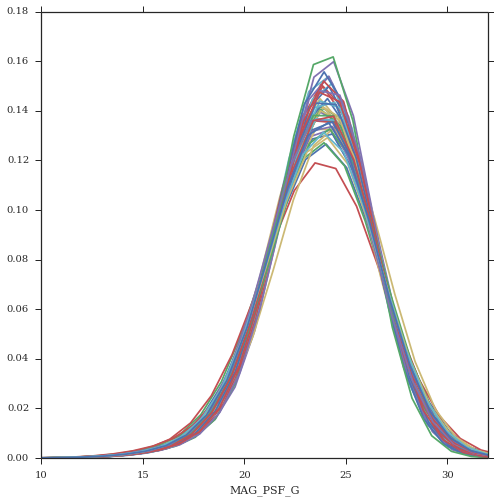

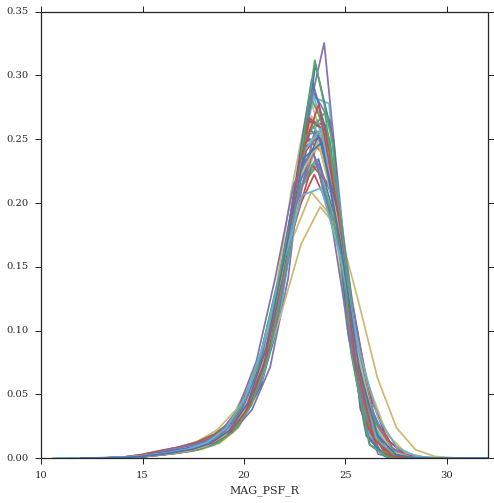

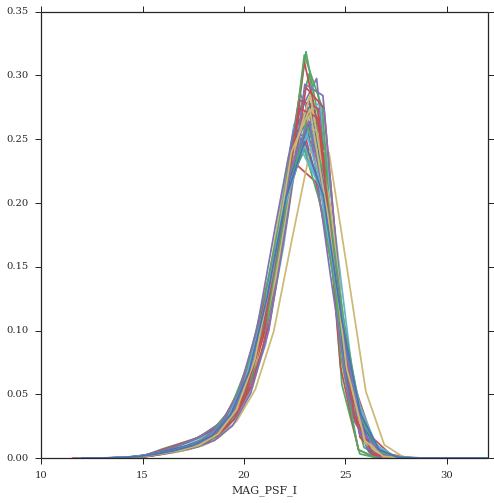

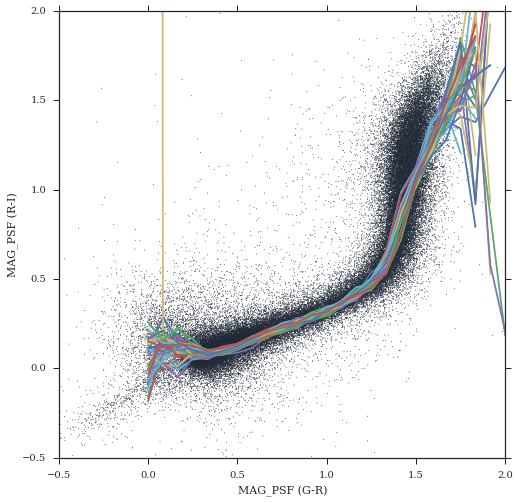

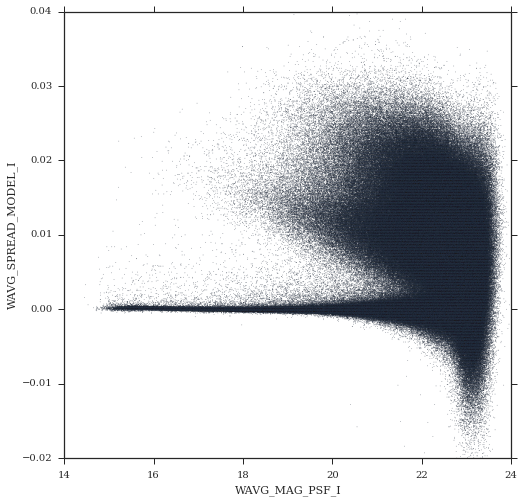

In [103]:
sns.set_style("whitegrid")
sns.set(color_codes=True)
sns.set(style="ticks")
sns.set_style({"font.family": "serif"})
bins=np.linspace(0,2,25)

f1, axes1 = plt.subplots(1, 1, figsize=(8, 8), sharex=True)
f2, axes2 = plt.subplots(1, 1, figsize=(8, 8), sharex=True)
f3, axes3 = plt.subplots(1, 1, figsize=(8, 8), sharex=True)
f4, axes4 = plt.subplots(1, 1, figsize=(8, 8), sharex=True)
f5, axes5 = plt.subplots(1, 1, figsize=(8, 8), sharex=True)

axes4.set_xlim(-0.5,2)
axes4.set_ylim(-0.5,2)
axes4.set_xlabel('MAG_PSF (G-R)')
axes4.set_ylabel('MAG_PSF (R-I)')

axes1.set_xlim(10,32)
axes2.set_xlim(10,32)
axes3.set_xlim(10,32)

axes5.set_xlim(14,24)
axes5.set_ylim(-0.02,0.04)
axes5.set_xlabel('WAVG_MAG_PSF_I')
axes5.set_ylabel('WAVG_SPREAD_MODEL_I')

y1a1_tiles=[]
sva1_tiles=[]
nobj = np.zeros((len(list2),3))
nstars = []

for tile_index in range(len(list2)):
    print(tile_index)

    list2[tile_index]
    tilename = list2[tile_index][:list2[tile_index].find('_r')]
    #df_data_i=con.query_to_pandas(qdata.format(list2[tile_index],'i'))
    #df_data_r=con.query_to_pandas(qdata.format(list2[tile_index].replace('_i_','_r_'),'r'))
    #df_data_g=con.query_to_pandas(qdata.format(list2[tile_index].replace('_i_','_g_'),'g'))
    #df_data=df_data_i.merge(df_data_r, on=['ID','TILENAME'])
    #df_data=df_data.merge(df_data_g, on=['ID','TILENAME'])
    #df_data.to_csv('df_data_%s.csv' % df_data.TILENAME.unique()[0], index=False)
    df_data = pd.read_csv('df_data_%s.csv' % tilename, sep=',')
    nobj[tile_index,0] = len(df_data)
    try:
        df_y1 = pd.read_csv('df_y1_%s.csv' % tilename, sep=',')
        y1a1_tiles.append(tilename)
        nobj[tile_index,1] = len(df_y1)
    except:
        pass
    try:
        df_sv = pd.read_csv('df_sv_%s.csv' % tilename, sep =',')
        sva1_tiles.append(tilename)
        nobj[tile_index,2] = len(df_sv)
    except:
        pass
    #df_y1=con.query_to_pandas(qy1.format(df_data.TILENAME.unique()[0]))
    #if len(df_y1) > 0:
    #    df_y1.to_csv('df_y1_%s.csv' % df_data.TILENAME.unique()[0], index=False)
    #df_sv=con.query_to_pandas(qsv1.format(df_data.TILENAME.unique()[0]))
    #if len(df_sv) > 0:
    #    df_sv.to_csv('df_sv_%s.csv' % df_data.TILENAME.unique()[0], index=False)
    sns.distplot(df_data.MAG_PSF_G, hist=False, kde_kws={"shade": False}, ax=axes1, norm_hist=True)
    sns.distplot(df_data.MAG_PSF_R, hist=False, kde_kws={"shade": False}, ax=axes2, norm_hist=True)
    sns.distplot(df_data.MAG_PSF_I, hist=False, kde_kws={"shade": False}, ax=axes3, norm_hist=True)
    axes5.scatter(df_data.WAVG_MAG_PSF_I, df_data.WAVG_SPREAD_MODEL_I,s=0.2,alpha=0.5)
    temp=df_data[(df_data.FLAGS_I < 4) & (df_data.IMAFLAGS_ISO_I == 0) & (df_data.MAG_PSF_G < 23) & (abs(df_data.SPREAD_MODEL_I) < 0.003)]
    nstars.append(len(temp))

    try:
    #COLOR
        temp['COLOR_G_R']=temp.MAG_PSF_G-temp.MAG_PSF_R
        temp['COLOR_R_I']=temp.MAG_PSF_R-temp.MAG_PSF_I
        axes4.scatter(temp.COLOR_G_R, temp.COLOR_R_I,s=0.25)
        groups = temp.groupby(np.digitize(temp.COLOR_G_R, bins))
        med = groups.median().COLOR_R_I
        axes4.plot(bins[groups.mean().index.values], med.values)
    except:
        print(tile_index,'f')
    

    
    


In [104]:
y1a1_tiles

['DES0005+0043',
 'DES0005+0209',
 'DES0406-5414',
 'DES0459-5622',
 'DES0501-5457',
 'DES0506-5705',
 'DES0508-5331',
 'DES0509-5414',
 'DES0513-5540',
 'DES2247-4414',
 'DES2251-4331',
 'DES2252-4249',
 'DES2253-4540',
 'DES2254-4457',
 'DES2255-4414',
 'DES2327-5248',
 'DES2348+0001',
 'DES2348-0041',
 'DES2348-0124',
 'DES2351-0041',
 'DES2351-0124',
 'DES2354+0043',
 'DES2354+0126',
 'DES2356+0001',
 'DES2356+0043',
 'DES2357+0126',
 'DES2359+0043',
 'DES2359+0126',
 'DES2359-0041',
 'DES2359-0124']

In [106]:
sva1_tiles

['DES0459-5622',
 'DES0501-5457',
 'DES0506-5705',
 'DES0508-5331',
 'DES0509-5414',
 'DES0513-5540',
 'DES2247-4414',
 'DES2251-4331',
 'DES2253-4540',
 'DES2254-4457',
 'DES2255-4414',
 'DES2327-5248']

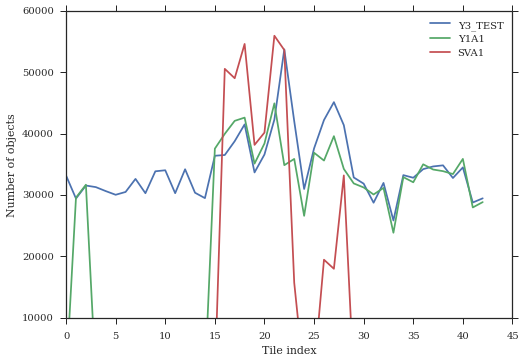

In [109]:
plt.plot(nobj[:,0],'-',label='Y3_TEST')
plt.plot(nobj[:,1],'-',label='Y1A1')
plt.plot(nobj[:,2],'-',label='SVA1')
plt.ylim(10000,60000)
plt.legend(loc=0)
plt.xlabel('Tile index')
plt.ylabel('Number of objects')

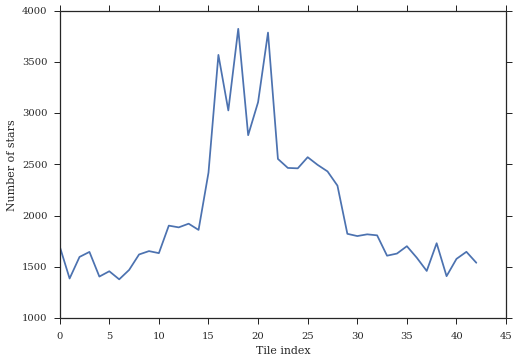

In [110]:
plt.plot(nstars)
plt.xlabel('Tile index')
plt.ylabel('Number of stars')

In [101]:
sum(nobj[:,0])

1477316.0

In [112]:
len(y1a1_tiles)

30

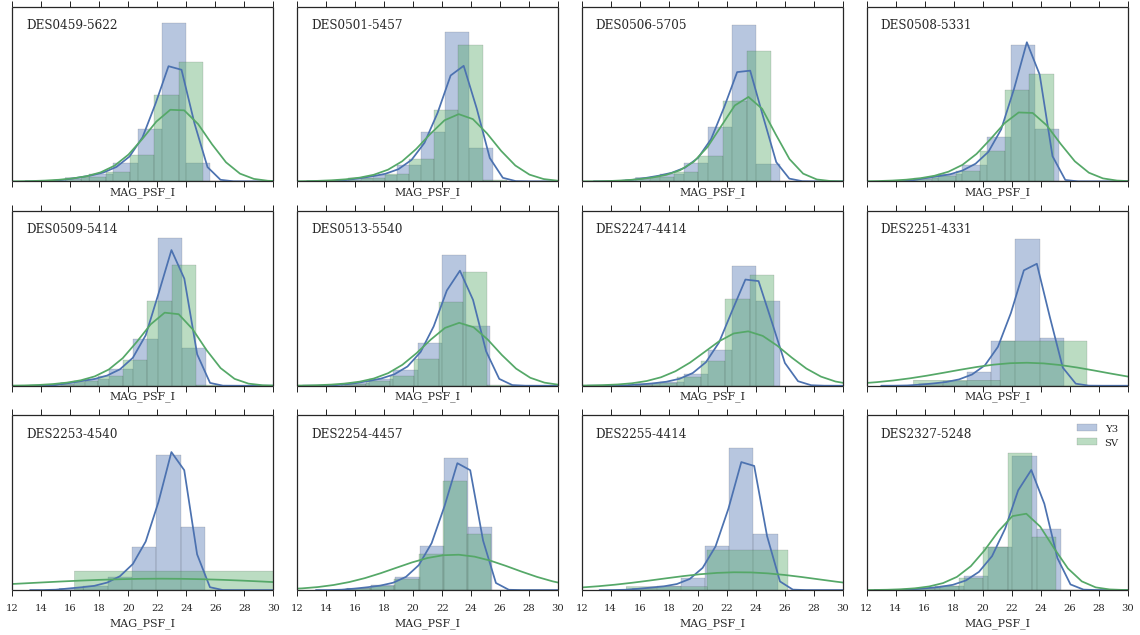

In [137]:
f, axes = plt.subplots(3, 4, figsize=(16, 9), sharex=True)
for i in range(len(sva1_tiles)):
    tilename = sva1_tiles[i]
    df_data = pd.read_csv('df_data_%s.csv' % tilename,sep=',')
    df_sv   = pd.read_csv('df_sv_%s.csv' % tilename, sep=',')
    myaxis = axes[np.unravel_index(i, (3,4))]
    myaxis.set_xlim(12,30)
    myaxis.set_ylim(0,0.4)
    myaxis.text(13,0.35,tilename)
    sns.distplot(df_data.MAG_PSF_I, hist=True, kde_kws={"shade": False}, ax=myaxis, norm_hist=True, label='Y3')
    sns.distplot(df_sv.MAG_PSF_I, hist=True, kde_kws={"shade": False}, ax=myaxis, norm_hist=True,label='SV')
    plt.legend(loc=0)
plt.setp(axes, yticks=[])
plt.tight_layout()
    

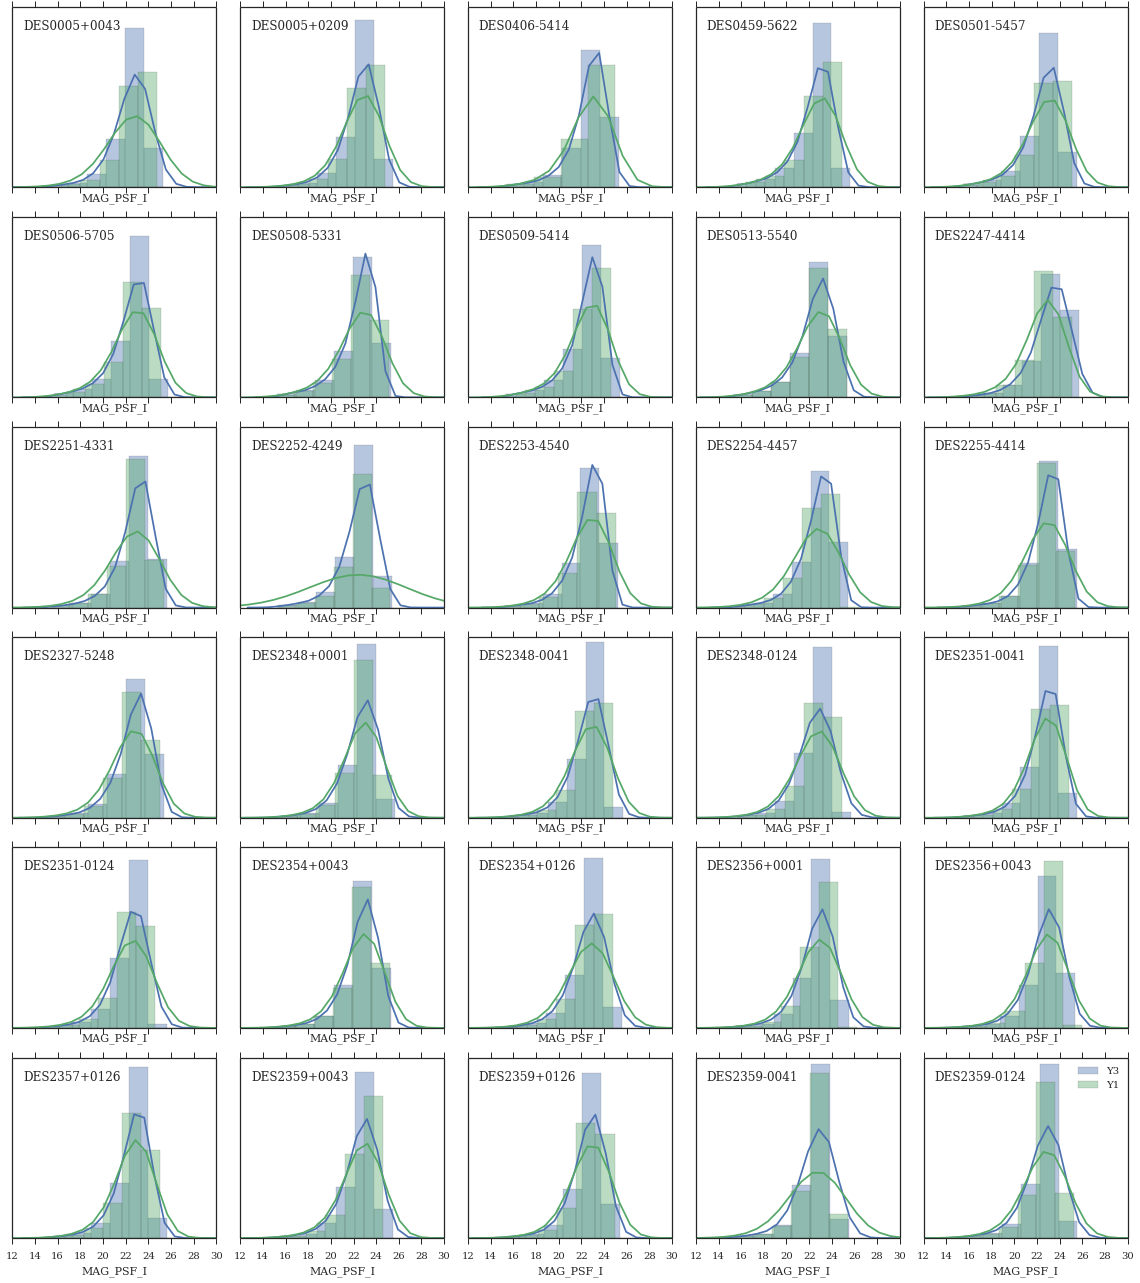

In [142]:
f, axes = plt.subplots(6, 5, figsize=(16, 18), sharex=True)
for i in range(len(y1a1_tiles)):
    tilename = y1a1_tiles[i]
    df_data = pd.read_csv('df_data_%s.csv' % tilename,sep=',')
    df_y1   = pd.read_csv('df_y1_%s.csv' % tilename, sep=',')
    myaxis = axes[np.unravel_index(i, (6,5))]
    myaxis.set_xlim(12,30)
    myaxis.set_ylim(0,0.4)
    myaxis.text(13,0.35,tilename)
    sns.distplot(df_data.MAG_PSF_I, hist=True, kde_kws={"shade": False}, ax=myaxis, norm_hist=True, label='Y3')
    sns.distplot(df_y1.MAG_PSF_I, hist=True, kde_kws={"shade": False}, ax=myaxis, norm_hist=True,label='Y1')
    plt.legend(loc=0)
plt.setp(axes, yticks=[])
plt.tight_layout()

In [140]:
common_tiles=[]
for t in sva1_tiles:
    if t in y1a1_tiles:
        common_tiles.append(t)

In [143]:
common_tiles

['DES0459-5622',
 'DES0501-5457',
 'DES0506-5705',
 'DES0508-5331',
 'DES0509-5414',
 'DES0513-5540',
 'DES2247-4414',
 'DES2251-4331',
 'DES2253-4540',
 'DES2254-4457',
 'DES2255-4414',
 'DES2327-5248']